In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline

In [40]:
df = pd.read_csv('data/churn_train.csv')

In [41]:
df[(df['signup_date'].str.len() != 10)]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct


In [73]:
df['signup_date'] = [pd.Timestamp(df['signup_date'][i]) for i in range(40000)]

In [74]:
df['last_trip_date'] = [pd.Timestamp(df['last_trip_date'][i]) for i in range(40000)]

In [75]:
df['active'] = (df['last_trip_date'] >= pd.Timestamp('2014-06-01')).astype(int)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null datetime64[ns]
phone                     39681 non-null object
signup_date               40000 non-null datetime64[ns]
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
active                    40000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 3.7+ MB


In [77]:
df['signup_date'].min(), df['signup_date'].max()

(Timestamp('2014-01-01 00:00:00'), Timestamp('2014-01-31 00:00:00'))

In [78]:
df['last_trip_date'].min(), df['last_trip_date'].max()

(Timestamp('2014-01-01 00:00:00'), Timestamp('2014-07-01 00:00:00'))

In [79]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,active
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,0


In [80]:
df['phone'].unique()

array(['Android', 'iPhone', nan], dtype=object)

In [81]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,active
count,40000.000000,39838.000000,33472.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,5.791302,4.777434,4.601697,1.074956,8.857342,2.280700,60.874382,0.375800
std,5.708056,0.448088,0.614810,0.222427,20.014008,3.811289,37.089619,0.484335
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,0.000000
75%,6.930000,5.000000,5.000000,1.050000,8.300000,3.000000,100.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.000000


In [82]:
df[(df['last_trip_date'] < df['signup_date'])]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,active


In [83]:
df[(df['avg_dist'] == 0)].count()

avg_dist                  122
avg_rating_by_driver      121
avg_rating_of_driver       59
avg_surge                 122
city                      122
last_trip_date            122
phone                     121
signup_date               122
surge_pct                 122
trips_in_first_30_days    122
luxury_car_user           122
weekday_pct               122
active                    122
dtype: int64

In [84]:
df[(df['last_trip_date'] > pd.Timestamp('2014-06-01'))].count()

avg_dist                  14635
avg_rating_by_driver      14605
avg_rating_of_driver      13351
avg_surge                 14635
city                      14635
last_trip_date            14635
phone                     14539
signup_date               14635
surge_pct                 14635
trips_in_first_30_days    14635
luxury_car_user           14635
weekday_pct               14635
active                    14635
dtype: int64

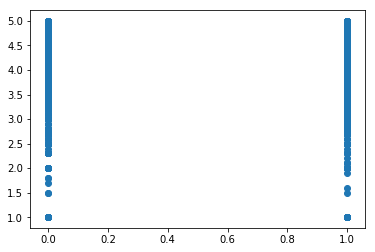

In [85]:
plt.scatter(df['active'], df['avg_rating_of_driver'])

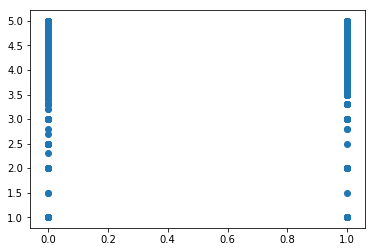

In [86]:
plt.scatter(df['active'], df['avg_rating_by_driver'])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


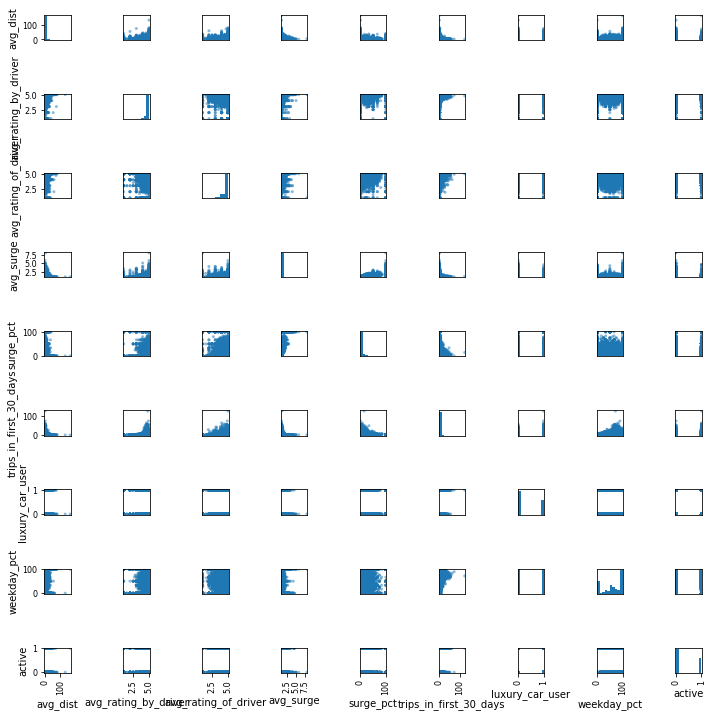

In [87]:
scatter_matrix(df, figsize =(10,10));
plt.tight_layout()

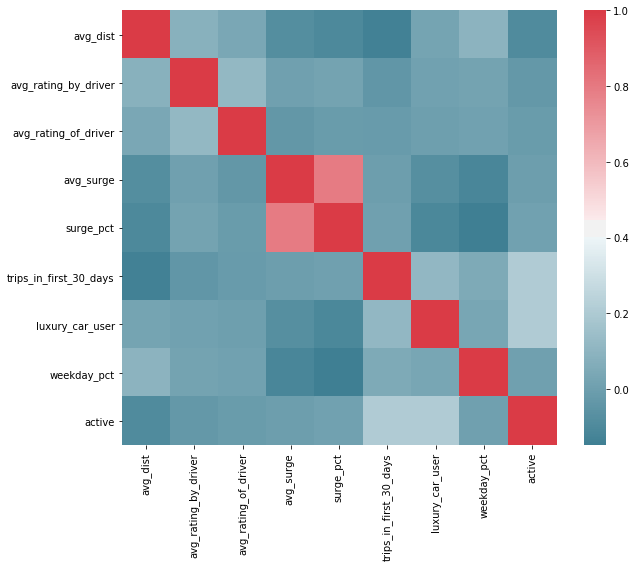

In [88]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


In [241]:
df['weekend_signup'] = (df['signup_date'].dt.dayofweek == 4) | (df['signup_date'].dt.dayofweek == 5)
df['weekday_signup'] = (df['signup_date'].dt.dayofweek <= 3) | (df['signup_date'].dt.dayofweek == 6)
num_weekend_signup = df[(df['signup_date'].dt.dayofweek == 4) | (df['signup_date'].dt.dayofweek == 5)]['avg_dist'].count()
num_weekday_signup = df[(df['signup_date'].dt.dayofweek <= 3) | (df['signup_date'].dt.dayofweek == 6)]['avg_dist'].count()
num_weekend_signup, num_weekday_signup

(15679, 24321)

In [327]:
df['weekend_only_user'] = df['weekday_pct'] == 0
df['weekday_mostly_user'] = df['weekday_pct'] > 90
df['mixed_dayofweek_user'] = (df['weekend_only_user'] == False) & (df['weekday_mostly_user'] == False)

num_weekend_only_user = df[df['weekend_only_user']]['avg_dist'].count()
num_weekday_mostly_user = df[df['weekday_mostly_user']]['avg_dist'].count()
num_mixed_dayofweek_user = df[df['mixed_dayofweek_user']]['avg_dist'].count()
num_weekend_only_user, num_weekday_mostly_user, num_mixed_dayofweek_user

(7365, 13844, 18791)

In [243]:
numweekend_signup_users = df[(df['weekend_signup'] == df['weekend_only_user']) & (df['weekend_signup'] == True)]['avg_dist'].count()
# numweekday_signup_users = 40000 - numweekend_signup_users
numweekend_signup_users, num_weekend_only_user, numweekend_signup_users/num_weekend_only_user


(3992, 7365, 0.54202308214528172)

In [244]:
numweekdayonly_signup_users =  df[(df['weekday_signup'] == df['weekday_mostly_user'])]
numweekdayonly_signup_users.count()['weekend_signup']

21679

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3c18d3c8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a3c2a2320>]], dtype=object)

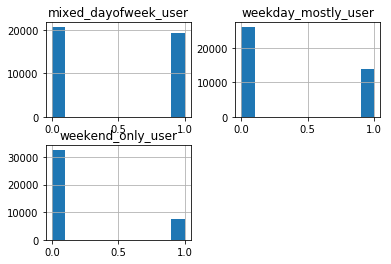

In [245]:
df.hist(column=['weekend_only_user', 'weekday_mostly_user', 'mixed_dayofweek_user'])

In [246]:
df['dayofweek_signup'] = df['signup_date'].dt.dayofweek

In [247]:
df['signup_date'].dt.day

0        12
1        25
2         2
3         9
4        31
5        29
6        18
7        11
8         1
9        28
10       18
11       26
12        5
13       19
14       14
15       16
16       25
17        7
18       10
19       26
20       14
21       28
22       15
23        7
24       26
25       25
26       12
27        4
28        3
29        6
         ..
39970    23
39971     8
39972    25
39973     6
39974    17
39975    18
39976     7
39977    18
39978    27
39979    20
39980    21
39981    11
39982     6
39983    30
39984    18
39985    15
39986    22
39987     5
39988     6
39989    15
39990    23
39991     1
39992    26
39993     3
39994    16
39995    26
39996     8
39997     4
39998     8
39999    18
Name: signup_date, Length: 40000, dtype: int64

Text(0,0.5,'#signups')

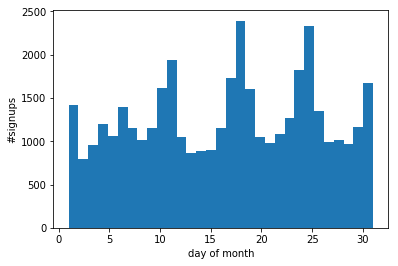

In [248]:
plt.hist(df['signup_date'].dt.day, bins=31)
plt.xlabel('day of month')
plt.ylabel('#signups')
#Martin Luther King Day Monday January 20
#Weekends 4,5 11,12 18,19 25,26
#Jan 1 was Wednesday

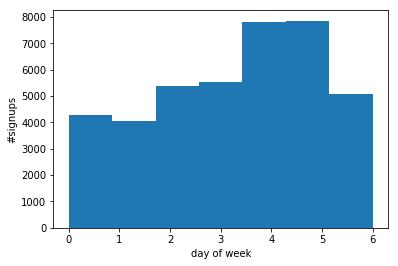

In [249]:
plt.hist(df['signup_date'].dt.dayofweek, bins=7)
plt.xlabel('day of week')
plt.ylabel('#signups');
#Martin Luther King Day Monday January 20
#Weekends 4,5 11,12 18,19 25,26
#Mon=0, Fri=4, Sat=5

In [250]:
df.groupby('signup_date').count()['avg_dist']
#Martin Luther King Day Monday January 20
#Weekends 4,5 11,12 18,19 25,26
#Mon=0, Fri=4, Sat=5
#avg per day = 1290.3

signup_date
2014-01-01    1414
2014-01-02     800
2014-01-03     962
2014-01-04    1205
2014-01-05    1066
2014-01-06    1396
2014-01-07    1155
2014-01-08    1014
2014-01-09    1148
2014-01-10    1615
2014-01-11    1935
2014-01-12    1054
2014-01-13     859
2014-01-14     892
2014-01-15     895
2014-01-16    1148
2014-01-17    1736
2014-01-18    2393
2014-01-19    1607
2014-01-20    1053
2014-01-21     982
2014-01-22    1080
2014-01-23    1268
2014-01-24    1827
2014-01-25    2332
2014-01-26    1353
2014-01-27     987
2014-01-28    1018
2014-01-29     964
2014-01-30    1168
2014-01-31    1674
Name: avg_dist, dtype: int64

In [251]:
signup_month = df.groupby(df['signup_date'].dt.month).count()
signup_month

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,active,weekend_signup,dayofweek_signup,weekday_signup,weekend_only_user,weekday_only_user,weekday_mostly_user,mixed_dayofweek_user
signup_date,,,,,,,,,,,,,,,,,,,,
1,40000,39838,33472,40000,40000,40000,39681,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000


In [252]:
# df['weekend_signup'].astype(int), df['active']
df[(df['weekend_signup']==1) & ( df['active']==1)]['avg_dist'].count()

5863

In [253]:
# df['weekday_signup'].astype(int), df['active']
df[(df['weekday_signup']==1) & (df['active']==1)]['avg_dist'].count()

9169

In [254]:
df[(df['weekend_signup']==1) & ( df['active']==0)]['avg_dist'].count()

9816

In [255]:
df[(df['weekday_signup']==1) & (df['active']==0)]['avg_dist'].count()

15152

In [256]:
df['luxury_car_user'] = df['luxury_car_user'].astype(int)

In [277]:
df['luxury_car_user'].astype(int)
df[(df['luxury_car_user']==1) & (df['active']==1)]['avg_dist'].count()

7596

In [278]:
df[(df['luxury_car_user']==0) & ( df['active']==1)]['avg_dist'].count()


7436

In [279]:
df[(df['luxury_car_user']==1) & (df['active']==0)]['avg_dist'].count()

7450

In [280]:
df[(df['luxury_car_user']==0) & ( df['active']==0)]['avg_dist'].count()

17518

In [295]:
df[(df['phone']=='iPhone') & (df['active']==1)]['avg_dist'].count()

12416

In [296]:
df[(df['phone']=='Android') & (df['active']==1)]['avg_dist'].count()

2518

In [297]:
df[(df['phone'].isnull()) & (df['active']==1)]['avg_dist'].count()

98

In [298]:
df[(df['phone']=='iPhone') & (df['active']==0)]['avg_dist'].count()

15212

In [299]:
df[(df['phone']=='Android') & (df['active']==0)]['avg_dist'].count()

9535

In [300]:
df[(df['phone'].isnull()) & (df['active']==0)]['avg_dist'].count()

221

In [ ]:
df['weekend_only_user']
df['weekday_mostly_user']
df['mixed_dayofweek_user']

In [330]:
for type in ['weekend_only_user', 'weekday_mostly_user', 'mixed_dayofweek_user']:
    print("{} churn: {}".format(type, df[(df[type]==1) & (df['active']==0)]['avg_dist'].count()))
    print("{} active: {}".format(type, df[(df[type]==1) & (df['active']==1)]['avg_dist'].count()))
    

weekend_only_user churn: 6081
weekend_only_user active: 1284
weekday_mostly_user churn: 10739
weekday_mostly_user active: 3105
mixed_dayofweek_user churn: 8148
mixed_dayofweek_user active: 10643


In [354]:
surged = (df['surge_pct'] > 20).astype(int)
surged.count(), df['active'].count()

(40000, 40000)

In [356]:
df[(surged==0) & (df['active']==0)]['avg_dist'].count()

21538

In [357]:
df[(surged==1) & (df['active']==0)]['avg_dist'].count()

3430

In [358]:
df[(surged==0) & (df['active']==1)]['avg_dist'].count()

12859

In [359]:
df[(surged==1) & (df['active']==1)]['avg_dist'].count()

2173